In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/DogCatClassification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/DogCatClassification/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/DogCatClassification/valid',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 2000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=50,validation_data=validation_ds)

Epoch 1/50
63/63 [==============================] - 14s 175ms/step - loss: 5.6021 - accuracy: 0.5595 - val_loss: 2.6764 - val_accuracy: 0.4975
Epoch 2/50
63/63 [==============================] - 11s 170ms/step - loss: 2.7292 - accuracy: 0.5805 - val_loss: 2.1570 - val_accuracy: 0.5030
Epoch 3/50
63/63 [==============================] - 9s 139ms/step - loss: 1.7637 - accuracy: 0.5940 - val_loss: 1.2531 - val_accuracy: 0.5195
Epoch 4/50
63/63 [==============================] - 11s 169ms/step - loss: 1.1360 - accuracy: 0.6030 - val_loss: 1.2298 - val_accuracy: 0.4870
Epoch 5/50
63/63 [==============================] - 11s 174ms/step - loss: 0.8849 - accuracy: 0.6315 - val_loss: 1.7725 - val_accuracy: 0.4935
Epoch 6/50
63/63 [==============================] - 9s 138ms/step - loss: 0.6534 - accuracy: 0.6760 - val_loss: 0.9169 - val_accuracy: 0.5480
Epoch 7/50
63/63 [==============================] - 10s 151ms/step - loss: 0.6007 - accuracy: 0.7000 - val_loss: 0.8987 - val_accuracy: 0.6020
E

In [ ]:
# Extract the training and validation accuracy from history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Print the final training and validation accuracy
final_training_accuracy = training_accuracy[-1]
final_validation_accuracy = validation_accuracy[-1]

print("Final Training Accuracy:", final_training_accuracy)
print("Final Validation Accuracy:", final_validation_accuracy)


Final Training Accuracy: 0.9729999899864197
Final Validation Accuracy: 0.6744999885559082


In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat.jpg')

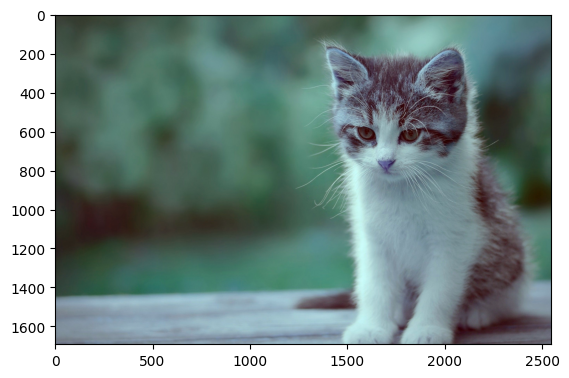

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(1692, 2545, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
predictions = model.predict(test_input)

1/1 [==============================] - 0s 111ms/step


In [ ]:
if predictions[0][0] < 0.5:
    print("It's a cat!")
else:
    print("It's a dog!")

It's a cat!


In [ ]:
test_img = cv2.imread('/content/dog.jpg')

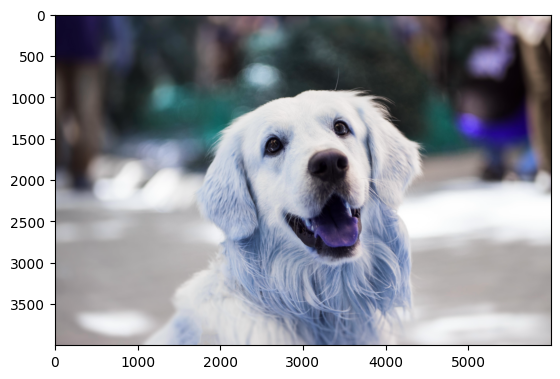

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(4000, 6000, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
predictions = model.predict(test_input)

1/1 [==============================] - 0s 28ms/step


In [ ]:
if predictions[0][0] < 0.5:
    print("It's a cat!")
else:
    print("It's a dog!")

It's a dog!
